In [28]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import saraRC1 as sara

In [29]:
img_path = './other'
imgs = []

for root, dirs, files in os.walk(img_path):
    for file in files:
        # imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2RGB))
        imgs.append(cv2.imread(os.path.join(root, file)))

In [38]:
seg_dim = 9
saliency_maps = {}
sara_heatmaps = {}
sara_lists = {}

In [40]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

# DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE = "cpu"

# you can use DeepGazeI or DeepGazeIIE
# model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 1 of 1 (deepgaze) [100.0%]


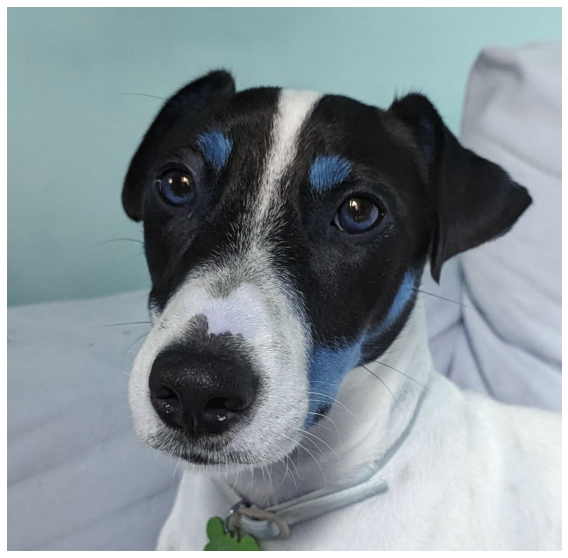

In [68]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.tight_layout()

generators = ['deepgaze']

g = 1

sara.WEIGHTS = (1, 1.5, 1, 1)

for i, im in enumerate(imgs[:]):
    if i not in saliency_maps:
        saliency_maps[i] = {}
        sara_heatmaps[i] = {}
        sara_lists[i] = {}

    for generator in generators:
        percent = round(g/(len(imgs)*len(generators))*100, 2)
        
        print(f'--> Processing image {i+1} of {len(imgs)} ({generator}) [{percent}%]')

        if generator == 'deepgaze':
            saliency_maps[i][generator] = sara.return_saliency(im.copy(), generator=generator, deepgaze_model=model)
        else:
            saliency_maps[i][generator] = sara.return_saliency(im.copy(), generator=generator)

        # saliency_maps[i]['blur'] = saliency_maps[i][generator]
        # saliency_maps[i]['blur'] = cv2.GaussianBlur(saliency_maps[i]['blur'], (31, 31), 10)
        # saliency_maps[i]['blur'] = saliency_maps[i]['blur'] // 16

        sara_heatmaps[i][generator], sara_lists[i][generator] = sara.return_sara(im.copy(), seg_dim, saliency_map=saliency_maps[i][generator])
        sara.reset()

        g += 1
    
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(im)
    plt.axis('off')


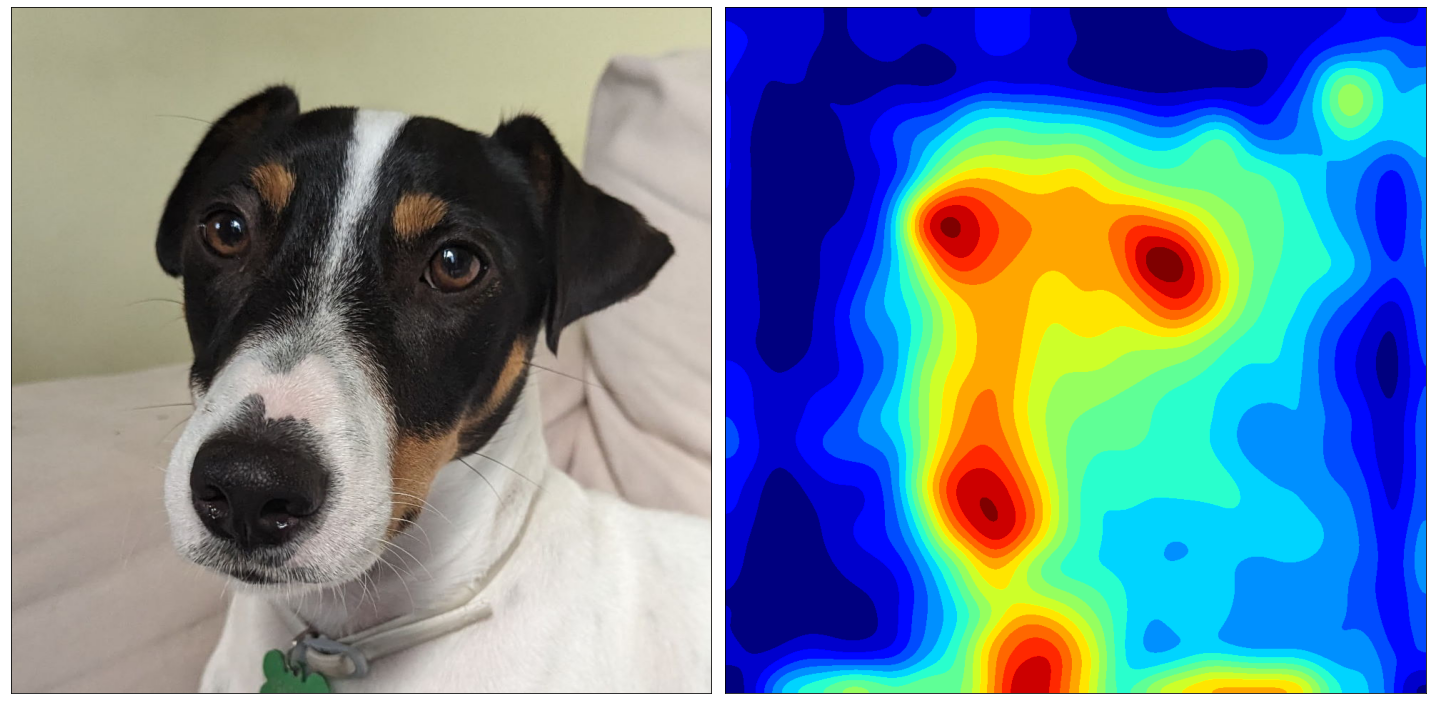

In [64]:
plt.figure(figsize=(20, 12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(saliency_maps[0]['deepgaze'], cmap='jet', alpha=1)
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

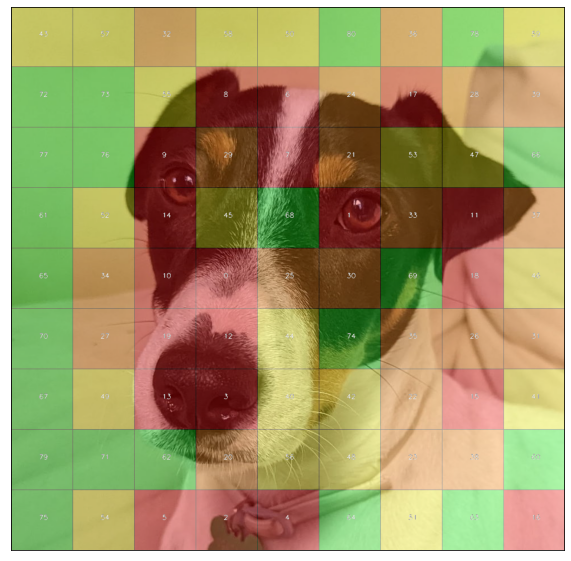

In [69]:
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(sara_heatmaps[0]['deepgaze'], cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()